In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(20)

data={
    'age': np.random.normal(50, 20, size=100),
    'weight': np.random.normal(85, 30, size=100),
    'height': np.random.normal(170, 10, size=100),
    'noise': np.random.normal(0,10,size=100)
}

df=pd.DataFrame(data)

In [3]:
df.head()

,age,weight,height,noise
0,67.677862,69.037623,154.960222,10.208650
1,53.917300,118.772766,183.139678,19.719219
2,57.150730,91.559732,169.698739,11.407991
3,3.134762,73.213541,176.350131,1.297550
4,28.303348,78.139082,175.024352,20.400517


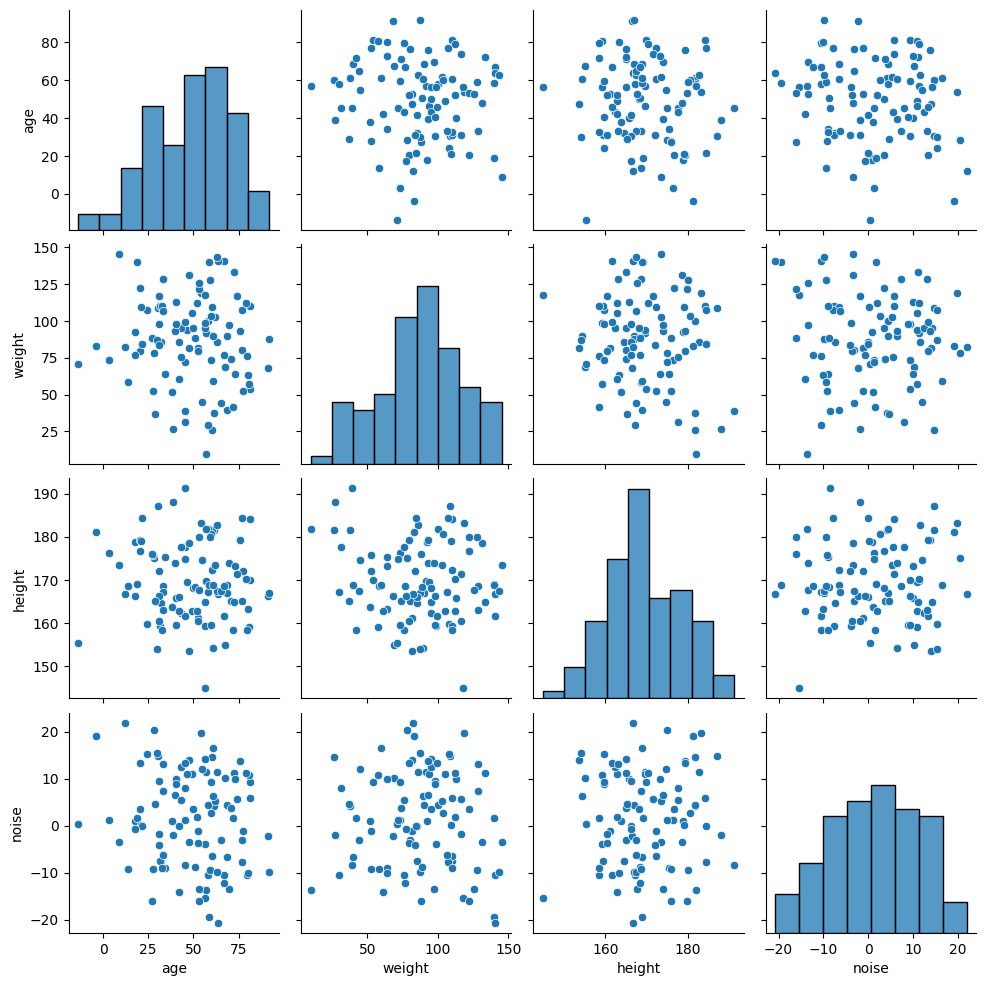

In [4]:
sns.pairplot(df)

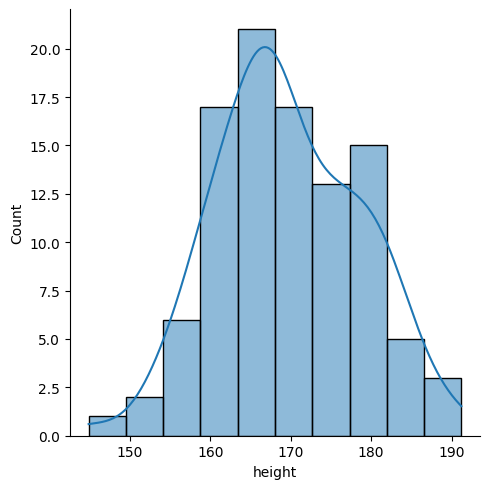

In [5]:
sns.displot(df['height'], kde=True, bins=10)

In [6]:
df.corr()

,age,weight,height,noise
age,1.000000,-0.081987,-0.066276,-0.129474
weight,-0.081987,1.000000,-0.118409,-0.066091
height,-0.066276,-0.118409,1.000000,0.034737
noise,-0.129474,-0.066091,0.034737,1.000000


<Axes: >

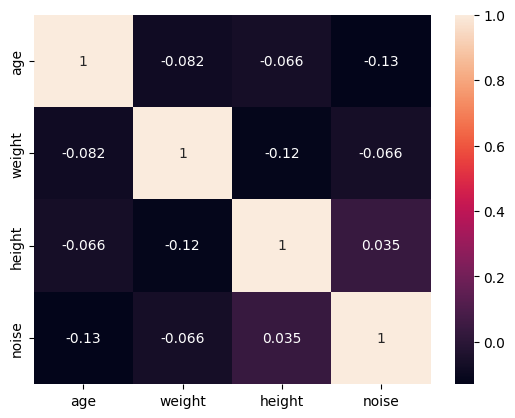

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
X=df[['height','age']]
y=df['weight']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=24)

In [11]:
# Linear model no regularization
from sklearn.linear_model import LinearRegression
my_lin=LinearRegression()

In [12]:
my_lin.fit(X_train, y_train)

LinearRegression()

In [13]:
pred=my_lin.predict(X_test)
acc=my_lin.score(X_test, y_test)
acc

0.04787479131043748

In [14]:
print('MAE:' ,metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSD:' ,np.sqrt(metrics.mean_squared_error(y_test, pred)))

<IPython.core.display.Javascript object>

MAE: 25.634240959769237


<IPython.core.display.Javascript object>

MSE: 1008.2235879225807


<IPython.core.display.Javascript object>

RMSD: 31.75253671634096


In [17]:
# Now using riidge regression and adding a penalty
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_test, y_test)
ridge_pred=ridge_reg.predict(X_test)

In [18]:
print('MAE:' ,metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:',metrics.mean_squared_error(y_test, ridge_pred))
print('RMSD:' ,np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

<IPython.core.display.Javascript object>

MAE: 22.834899430262688


<IPython.core.display.Javascript object>

MSE: 834.1558491482745


<IPython.core.display.Javascript object>

RMSD: 28.881756337665383


In [20]:
print(my_lin.coef_)
print(ridge_reg.coef_)

[-0.20524738 -0.04981382]
[-1.3022644  -0.59672691]


#### Lasso and ElasticNet Regularization

In [21]:
from sklearn.linear_model import Lasso, ElasticNet

In [23]:
my_lasso=Lasso(alpha=1.0)
my_lasso.fit(X_train, y_train)
laso_pred=my_lasso.predict(X_test)

In [24]:
print('MAE:' ,metrics.mean_absolute_error(y_test, laso_pred))
print('MSE:',metrics.mean_squared_error(y_test, laso_pred))
print('RMSD:' ,np.sqrt(metrics.mean_squared_error(y_test, laso_pred)))

<IPython.core.display.Javascript object>

MAE: 25.668833282555347


<IPython.core.display.Javascript object>

MSE: 1011.1300055409514


<IPython.core.display.Javascript object>

RMSD: 31.7982704803414


### ElasticNet (L1+L2)

In [25]:
my_elastic=ElasticNet(alpha=1, l1_ratio=0.5)
my_elastic.fit(X_train, y_train)
my_elastic_pred=my_elastic.predict(X_test)

In [26]:
print('MAE:' ,metrics.mean_absolute_error(y_test, my_elastic_pred))
print('MSE:',metrics.mean_squared_error(y_test, my_elastic_pred))
print('RMSD:' ,np.sqrt(metrics.mean_squared_error(y_test, my_elastic_pred)))

<IPython.core.display.Javascript object>

MAE: 25.65428267717258


<IPython.core.display.Javascript object>

MSE: 1009.9047675658188


<IPython.core.display.Javascript object>

RMSD: 31.778998844611497


#### Choosing right value for alpha

In [29]:
from sklearn.linear_model import RidgeCV

In [33]:
alphas=[0.01, 0.1, 1, 10, 100, 1000]

ridge_reg_2=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_reg_2.fit(X_train, y_train)
ridge_pred_2=ridge_reg_2.predict(X_test)

print("Best alpha (ridge): ", ridge_reg_2.alpha_)

Best alpha (ridge):  1000.0


/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


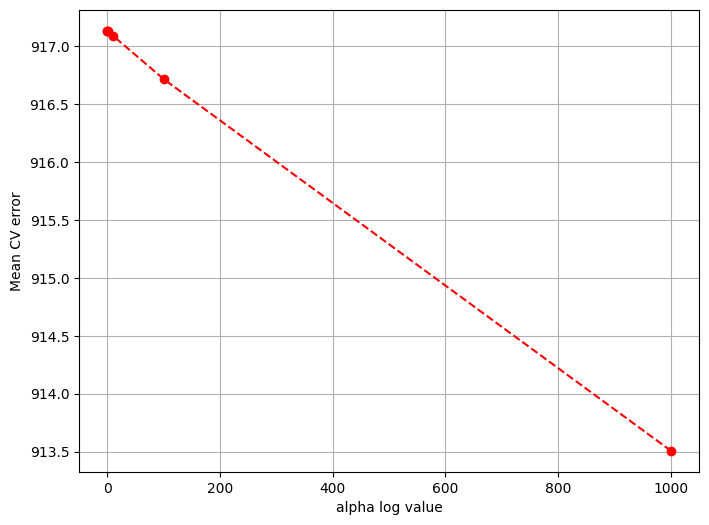

In [39]:
mean_cv_errors=np.mean(ridge_reg_2.cv_values_, axis=0)
plt.figure(figsize=(8,6))
plt.plot(alphas, mean_cv_errors, marker="o", linestyle='--', color="red")
plt.grid(True)
plt.xlabel('alpha log value')
plt.ylabel('Mean CV error')
plt.show()